
# 결측치, 이상치 처리하기

## 결측치 인식
* dataframe.isna() <br>
데이터의 요소가 결측치일 경우 TRUE 반환하고, 그렇지 않을 경우 FALSE 반환  <br>
<b>.isna() = .isnull()</b>
* 변수별로 데이터의 각 행에 결측치가 있는지 확인 후 반환
* 합을 구해 결측치의 개수를 쉽게 파악 가능
      
      
### 결측치가 있는/없는 행 확인
* na가 있는 행들 저장 : df_row_with_na = df[df.isna().any(axis=1)]
* na가 없는 행들 저장 : df_row_without_na = df.dropna()

__[예제 1]__    
    
airquality 데이터의 Ozone 변수에 대한 결측치 여부를 파악하고, 만약 결측치가 있다면 그 개수를 확인해라      


In [1]:
import pandas as pd 
import numpy as np 

In [2]:
air = pd.read_csv('../../data/airquality.csv')
print(air.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [4]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [7]:
# Ozone 변수에 존재하는 na의 개수 산출
air.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [8]:
air['Ozone'].isna()  #isna()사용

0      False
1      False
2      False
3      False
4       True
       ...  
148    False
149     True
150    False
151    False
152    False
Name: Ozone, Length: 153, dtype: bool

In [10]:
air[air['Ozone'].isna()]

,Ozone,Solar.R,Wind,Temp,Month,Day
4,NaN,NaN,14.3,56,5,5
9,NaN,194.0,8.6,69,5,10
24,NaN,66.0,16.6,57,5,25
25,NaN,266.0,14.9,58,5,26
26,NaN,NaN,8.0,57,5,27
31,NaN,286.0,8.6,78,6,1
32,NaN,287.0,9.7,74,6,2
33,NaN,242.0,16.1,67,6,3
34,NaN,186.0,9.2,84,6,4
35,NaN,220.0,8.6,85,6,5


In [11]:
# Ozone 변수에서 na가 아닌 값과 na 값의 개수 비교
tb = air['Ozone'].isna().value_counts()
tb

False    116
True      37
Name: Ozone, dtype: int64

In [9]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


__[예제 2]__    
    
airquality 데이터에서 결측치가 하나라도 존재하는 행들을 air_na 변수에 저장하고   
결측치를 하나도 가지지 않는 행들을 air_com 변수에 저장하기

In [12]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [17]:
len(air[air.isna().any(axis=1)])

42

In [14]:
air_com = air.dropna()
air_com.head()  

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
6,23.0,299.0,8.6,65,5,7


## 결측치 처리
###  결측치 대치법 이해
<b>가.</b> 단순 대치법
* complete analysis : 결측값이 존재하는 행 삭제
* 평균 대치법 : 관측 또는 실험을 통해 얻어진 데이터의 평균으로 결측치 대치
* 단순확률 대치법 : Hot-deck 방법, nearest neighbor 방법 등
    
<b>나.</b> 다중 대치법
* 단순 대치법을 m번 수행해 m개의 가상적 완전 자료를 만듦
* [대치] - [분석] - [결합] 단계

### 결측치 제거
* 결측치가 존재하는 행/열 제거
   
<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">데이터명.dropna()</td>
            <td style="text-align: left;">행 기준으로 결측치가 있는 행은 모두 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(axis=1)</td>
            <td style="text-align: left;">열 기준으로 결측치가 있는 열은 모두 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(how='all')</td>
            <td style="text-align: left;">행 전체가 결측값인 행만 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(thresh=2)</td>
            <td style="text-align: left;">결측치의 갯수 수치를 지정해서 임계치를 넘어가면 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(subset=['컬럼명1', '컬럼명2'])</td>
            <td style="text-align: left;">특정 컬럼 내의 결측치만 삭제</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(inplace=True)</td>
            <td style="text-align: left;">결측치 제거한 상태를 바로 적용</td>
        </tr>
    </table>
</div>

### 결측치 대치법
* 해당 변수 값들을 특정 값으로 대치함
<div style="font-weight: bold; font-size: 120%; margin-left:30px"> 
    <table align="left" margin:50 font-size: 120%>
        <tr>
            <td style="text-align: left;">데이터명.fillna(0)</td>
            <td style="text-align: left;">결측값을 0으로 대체</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(method='ffill 또는 'pad')</td>
            <td style="text-align: left;">결측값을 앞방향으로 채워나감</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(method='bfill' 또는 'backfill')</td>
            <td style="text-align: left;">결측값을 뒷 방향으로 채워나감</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(method='ffill', limit=1)</td>
            <td style="text-align: left;">앞/뒤 방향으로 결측값을 채우는 횟수를 1번으로 제한</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(데이터명.mean())</td>
            <td style="text-align: left;">결측값을 변수별 평균으로 대체</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.dropna(inplace=True)</td>
            <td style="text-align: left;">결측치 제거한 상태를 바로 적용</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명.fillna(데이터명.median())</td>
            <td style="text-align: left;">결측치를 중앙값으로 대체</td>
        </tr>
        <tr>
            <td style="text-align: left;">데이터명['컬럼명'].describe()['top']</td>
            <td style="text-align: left;">범주형 변수 열의 최빈값으로 결측치를 대체</td>
        </tr>
    </table>
</div>

__[예제]__    
    
airquality의 Ozone 변수값이 존재하지 않는 경우, Ozone 변수 값들의 평균으로 대치하기

In [18]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [19]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [20]:
air['Ozone'].mean()

42.12931034482759

In [23]:
air['Ozone'] = air['Ozone'].fillna(air['Ozone'].mean())

In [24]:
air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.0,7.4,67,5,1
1,36.00000,118.0,8.0,72,5,2
2,12.00000,149.0,12.6,74,5,3
3,18.00000,313.0,11.5,62,5,4
4,42.12931,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.00000,193.0,6.9,70,9,26
149,42.12931,145.0,13.2,77,9,27
150,14.00000,191.0,14.3,75,9,28
151,18.00000,131.0,8.0,76,9,29


### 사이킷런을 활용한 결측치 대치 - KNN

In [25]:
from sklearn.impute import KNNImputer

In [26]:
import numpy as np
import pandas as pd

In [27]:
air = pd.read_csv('../../data/airquality.csv')
imputer = KNNImputer(n_neighbors=2)

In [22]:
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [29]:
air_filled = imputer.fit_transform(air)
air_filled

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [ 18.5, 206. ,  14.3,  56. ,   5. ,   5. ],
       [ 28. , 270.5,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [ 17.5, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. , 109. ,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6

In [30]:
pre_air = pd.DataFrame(air_filled,columns=air.columns)

In [31]:
pre_air

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,18.5,206.0,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70.0,9.0,26.0
149,24.5,145.0,13.2,77.0,9.0,27.0
150,14.0,191.0,14.3,75.0,9.0,28.0
151,18.0,131.0,8.0,76.0,9.0,29.0


In [32]:
pre_air.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

## 이상치 인식
### 사분위수
* 데이터명.describe()
    * 결측치가 아닌 데이터행의 개수
    * 평균/표준편차
    * 최소/최댓값
    * Q1, Q2, Q3 나타내줌
* IQR을 이용한 이상치 탐색 : 함수 생성

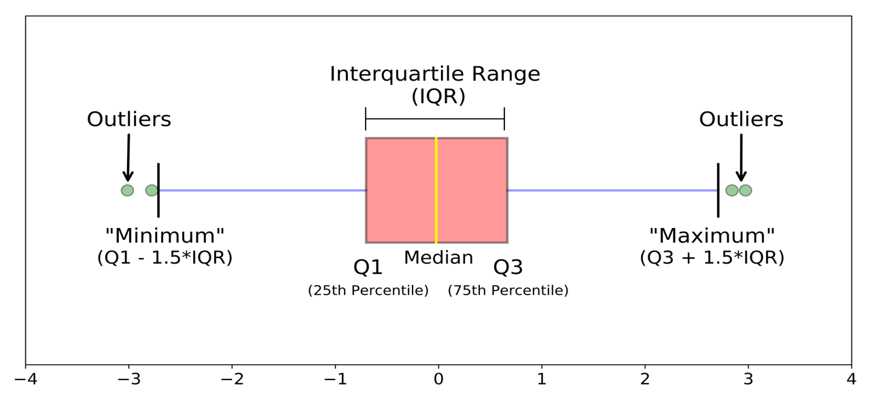

In [27]:
from PIL import Image
image1 = Image.open("./box_plot.png")
image1.resize((870,400))

<AxesSubplot:xlabel='Ozone'>

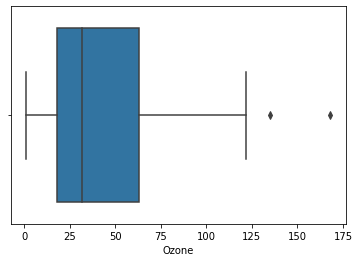

In [33]:
# Ozone 변수에서 이상치를 박스플롯으로 확인
import seaborn as sns

sns.boxplot(x='Ozone', data=air)

In [34]:
# IQR 을 이용한 이상치 탐색 함수

def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    IQR_weight = IQR*weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index
    
    return outlier_idx

In [35]:
# IQR로 이상치를 찾아 인덱스 저장되어 있음 

out_index = detect_outliers(df=air, column='Ozone')
out_index

Int64Index([61, 116], dtype='int64')

In [37]:
air.loc[out_index,'outlier']=True

In [38]:
air[air['outlier']==True]

,Ozone,Solar.R,Wind,Temp,Month,Day,outlier
61,135.0,269.0,4.1,84,7,1,True
116,168.0,238.0,3.4,81,8,25,True


In [39]:
# outlier 대체 (중위 값 혹은 평균값으로)
air.loc[out_index,'Ozone'] = air['Ozone'].median()
air.loc[out_index,'Ozone'] 

61     31.5
116    31.5
Name: Ozone, dtype: float64

<AxesSubplot:xlabel='Ozone'>

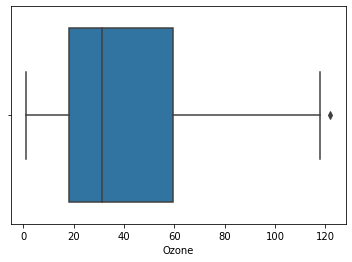

In [40]:
sns.boxplot(x='Ozone', data=air)

In [41]:

out_index = detect_outliers(df=air, column='Ozone')
out_index

Int64Index([98], dtype='int64')

In [42]:
# outlier 제거
air_2 = air.drop(out_index).reset_index(drop=True)

In [43]:
air_2

,Ozone,Solar.R,Wind,Temp,Month,Day,outlier
0,41.0,190.0,7.4,67,5,1,NaN
1,36.0,118.0,8.0,72,5,2,NaN
2,12.0,149.0,12.6,74,5,3,NaN
3,18.0,313.0,11.5,62,5,4,NaN
4,NaN,NaN,14.3,56,5,5,NaN
...,...,...,...,...,...,...,...
147,30.0,193.0,6.9,70,9,26,NaN
148,NaN,145.0,13.2,77,9,27,NaN
149,14.0,191.0,14.3,75,9,28,NaN
150,18.0,131.0,8.0,76,9,29,NaN


<AxesSubplot:xlabel='Ozone'>

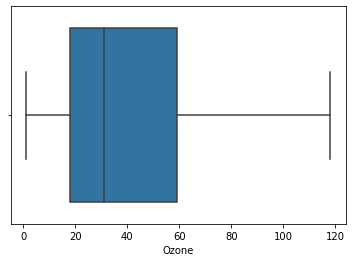

In [44]:
sns.boxplot(x='Ozone', data=air_2)